In [21]:
#pip install tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN: (samples, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


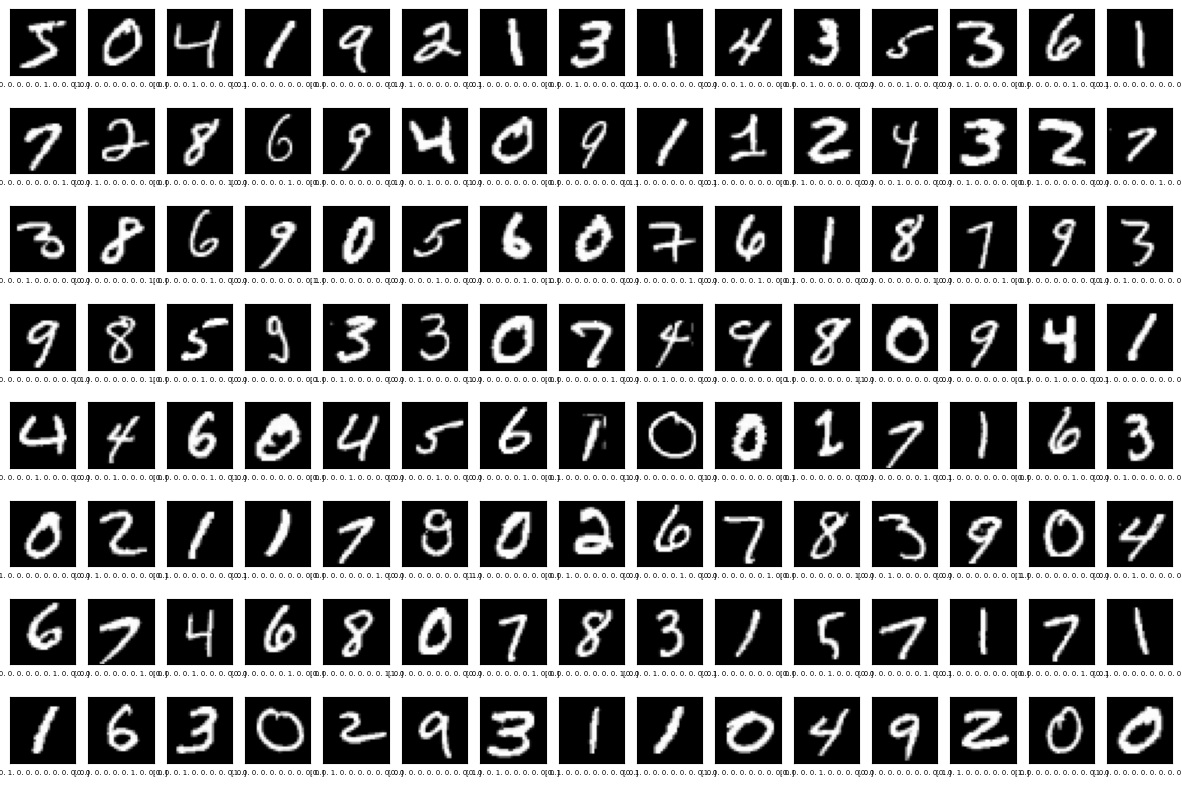

In [8]:
# Corrected code to display images
plt.figure(figsize=(15, 10))
for i in range(120):
    plt.subplot(8, 15, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')      # use x_train
    plt.xlabel(y_train[i], fontsize=5)       # label using y_train
plt.show()


In [11]:
#print(x_train)

In [12]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

lenet_model = Sequential([
    Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1), padding='same'),
    AveragePooling2D(pool_size=(2,2)),       # <-- specify pool_size
    Conv2D(16, kernel_size=(5,5), activation='tanh'),
    AveragePooling2D(pool_size=(2,2)),       # <-- specify pool_size
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lenet_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
lenet_history = lenet_model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=128)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8985 - loss: 0.3471 - val_accuracy: 0.9633 - val_loss: 0.1284
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9614 - loss: 0.1272 - val_accuracy: 0.9760 - val_loss: 0.0860
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9741 - loss: 0.0843 - val_accuracy: 0.9818 - val_loss: 0.0640
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9808 - loss: 0.0630 - val_accuracy: 0.9842 - val_loss: 0.0582
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9813 - val_loss: 0.0603
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9877 - loss: 0.0402 - val_accuracy: 0.9822 - val_loss: 0.0606
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9857 - val_loss: 0.0538
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9909 - loss: 0.0291 - val_ac

In [8]:
# Flatten input for ANN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.summary()


C:\Users\Sridhar\PycharmProjects\per person\LENET5\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
ann_history = ann_model.fit(x_train_flat, y_train, validation_split=0.1, epochs=10, batch_size=128)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9280 - loss: 0.2442 - val_accuracy: 0.9708 - val_loss: 0.0953
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9730 - loss: 0.0857 - val_accuracy: 0.9765 - val_loss: 0.0824
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9829 - loss: 0.0553 - val_accuracy: 0.9803 - val_loss: 0.0694
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9867 - loss: 0.0406 - val_accuracy: 0.9793 - val_loss: 0.0776
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9907 - loss: 0.0283 - val_accuracy: 0.9817 - val_loss: 0.0726
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9935 - loss: 0.0199 - val_accuracy: 0.9785 - val_loss: 0.0802
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.9828 - val_loss: 0.0747
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9946 - loss: 0.0156 - val_accur

In [11]:
lenet_acc = lenet_model.evaluate(x_test, y_test)
ann_acc = ann_model.evaluate(x_test_flat, y_test)

print(f"LeNet-5 Test Accuracy: {lenet_acc[1]*100:.2f}%")
print(f"ANN Test Accuracy: {ann_acc[1]*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9843 - loss: 0.0484
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9793 - loss: 0.0854
LeNet-5 Test Accuracy: 98.43%
ANN Test Accuracy: 97.93%
